<a href="https://colab.research.google.com/github/wuzuki-tan/Crime_Forecasting/blob/main/Crime_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
traindf=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
print("features : ",traindf.columns[:-1])
print("label : ",[traindf.columns[-1]])

features :  Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description'],
      dtype='object')
label :  ['Crime_Category']


# Preprocessing of the Data
#### The steps I have followed to preprocess the data are as follows:
1. Understand the data : This step includes forming a fundamental understanding of the dataset, type of columns, distribution of the target variable and taking appropriate steps.
2. Handling missing values.
3. Removing redundant features.
4. Handling modus operandi column.
5. Performing encoding and scaling operations.

In [ ]:
traindf.sample(5)

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
8943,11200 W VENTURA BL,NaN,34.1430,-118.3727,09/01/2020 12:00:00 AM,08/12/2020 12:00:00 AM,1340.0,15.0,N Hollywood,1585.0,...,0.0,M,O,404.0,DEPARTMENT STORE,NaN,NaN,IC,Invest Cont,Property Crimes
5261,1200 W MAURETANIA ST,NaN,33.7895,-118.2777,03/17/2020 12:00:00 AM,03/17/2020 12:00:00 AM,1030.0,5.0,Harbor,514.0,...,55.0,M,H,104.0,DRIVEWAY,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,Violent Crimes
12888,105TH ST,SAN PEDRO ST,33.9470,-118.2684,12/19/2020 12:00:00 AM,12/19/2020 12:00:00 AM,1530.0,18.0,Southeast,1823.0,...,33.0,M,H,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes
1541,FIGUEROA ST,MARTIN LUTHER KING JR BL,34.0112,-118.2827,03/11/2020 12:00:00 AM,03/11/2020 12:00:00 AM,2315.0,3.0,Southwest,399.0,...,41.0,M,B,101.0,STREET,307.0,VEHICLE,IC,Invest Cont,Violent Crimes
16334,1200 S COCHRAN AV,NaN,34.0504,-118.3518,10/02/2020 12:00:00 AM,10/02/2020 12:00:00 AM,1300.0,7.0,Wilshire,755.0,...,44.0,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes


In [ ]:
traindf.shape

(20000, 22)

In [ ]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

#### Let us visualize the frequency distribution of our target variable which is "Crime_Category"

In [ ]:
traindf['Crime_Category'].value_counts()

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64

Text(0, 0.5, 'count')

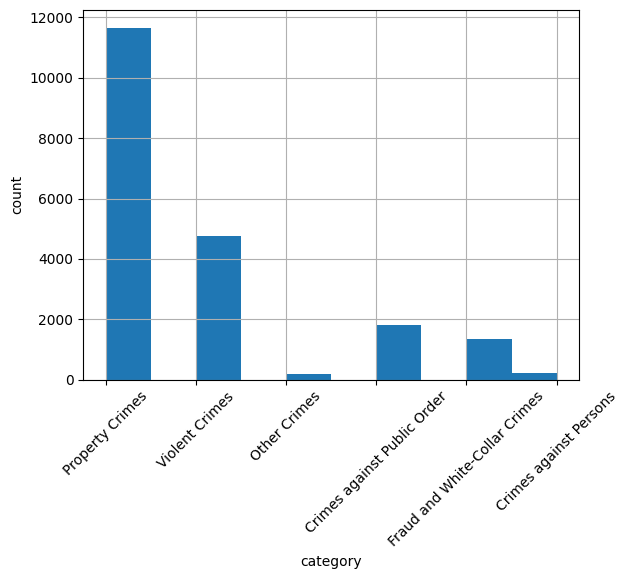

In [ ]:
#the following code creates a bar chart of each category in "Crime_Category" label.
traindf["Crime_Category"].hist(xrot=45,)
plt.xlabel("category")
plt.ylabel('count')


#### From the above graph, a significant observation we can get is a slight imbalance of the categories where "Property Crimes" has the highest frequency. This observation should make us consider the scope of using balancing techniques like oversampling through SMOTE in case where model becomes biased towards "Property Crimes" category.

#### Now, let us analyze number of unique and missing values in each column.

In [ ]:
traindf.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

#### We can observe that the columns having missing values are categorical in nature which can be handled by using SimpleImputer with "most_frequent" strategy.

In [ ]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
traindf[traindf.columns]=si.fit_transform(traindf[traindf.columns])

In [ ]:
#code to find the number of unique values in each columns
traindf.nunique()

Location                 12399
Cross_Street              1495
Latitude                  3622
Longitude                 3578
Date_Reported              811
Date_Occurred              366
Time_Occurred              996
Area_ID                     21
Area_Name                   21
Reporting_District_no     1120
Part 1-2                     2
Modus_Operandi           10489
Victim_Age                 100
Victim_Sex                   4
Victim_Descent              17
Premise_Code               217
Premise_Description        216
Weapon_Used_Code            57
Weapon_Description          57
Status                       5
Status_Description           5
Crime_Category               6
dtype: int64

### These are the following observations:
#### 1. From the above result, we can observe that columns like "Location","Cross_Street","Modus_Operandi" have huge number of unique number with them being categorical in nature.
##### One Hot Encoding should not be a wise choice as due to high cardinality, it may lead to huge number of columns ultimately leading to sparse dataset.
##### As "Cross_Street" has anyways large number of missing values, we can consider to drop the column.
   ##### We can encode "Location" based on frequency.
#### 2. "Area_Name" is redundant with "Area_ID", "Weapon_Used_Code" is redundant with "Weapon_Description", "Status_Description" is redundant with "Status", "Premise_Description" is redundant with "Premise_Code". So we can consider to drop the columns with object data type.

In [ ]:
#code to drop the redundant features as mentioned earlier
traindf=traindf.drop(['Weapon_Description','Premise_Description','Status_Description','Area_Name'],axis=1)

In [ ]:
#code to encode "Location" based on frequency
address_freq = traindf['Location'].value_counts().to_dict() #takes the value_counts of the Location and converts into a dictionary
traindf['Location'] = traindf['Location'].map(address_freq)#the dictionary is used to map the dictionary on "Location" column
traindf

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Crime_Category
0,1,BROADWAY,34.1522,-118.391,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,1563.0,1.0,0385,75.0,M,W,101.0,400.0,IC,Property Crimes
1,2,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,400.0,IC,Property Crimes
2,3,BROADWAY,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,1343.0,2.0,0329 1202,67.0,M,B,501.0,400.0,IC,Property Crimes
3,1,BROADWAY,34.2953,-118.459,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,1924.0,1.0,0329 1300,61.0,M,H,101.0,400.0,IC,Property Crimes
4,1,BROADWAY,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,400.0,IC,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,BROADWAY,34.0334,-118.3523,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,700.0,3.0,303.0,2.0,0416 0446 2004 0913,51.0,M,H,501.0,400.0,IC,Violent Crimes
19996,3,BROADWAY,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259.0,10.0,1008.0,1.0,1822 0209 0344 1414 1420,0.0,M,W,301.0,400.0,IC,Property Crimes
19997,3,BROADWAY,34.0571,-118.3815,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,1400.0,8.0,849.0,1.0,0344 1822 1420,42.0,M,H,102.0,400.0,IC,Property Crimes
19998,2,BROADWAY,33.7451,-118.2835,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,600.0,5.0,558.0,2.0,1202 2038 0913 0602 1242 0553,76.0,F,H,501.0,400.0,IC,Crimes against Public Order


In [ ]:
#code to drop "Cross_Street" column
traindf.drop(['Cross_Street'],axis=1,inplace=True)
traindf

,Location,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Crime_Category
0,1,34.1522,-118.391,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,1563.0,1.0,0385,75.0,M,W,101.0,400.0,IC,Property Crimes
1,2,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,400.0,IC,Property Crimes
2,3,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,1343.0,2.0,0329 1202,67.0,M,B,501.0,400.0,IC,Property Crimes
3,1,34.2953,-118.459,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,1924.0,1.0,0329 1300,61.0,M,H,101.0,400.0,IC,Property Crimes
4,1,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,400.0,IC,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,34.0334,-118.3523,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,700.0,3.0,303.0,2.0,0416 0446 2004 0913,51.0,M,H,501.0,400.0,IC,Violent Crimes
19996,3,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259.0,10.0,1008.0,1.0,1822 0209 0344 1414 1420,0.0,M,W,301.0,400.0,IC,Property Crimes
19997,3,34.0571,-118.3815,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,1400.0,8.0,849.0,1.0,0344 1822 1420,42.0,M,H,102.0,400.0,IC,Property Crimes
19998,2,33.7451,-118.2835,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,600.0,5.0,558.0,2.0,1202 2038 0913 0602 1242 0553,76.0,F,H,501.0,400.0,IC,Crimes against Public Order


#### Let us analyze "Modus_Operandi" column.

In [ ]:
traindf['Modus_Operandi']

0                                           0385
1        0906 0352 0371 0446 1822 0344 0416 0417
2                                      0329 1202
3                                      0329 1300
4                  0416 0945 1822 0400 0417 0344
                          ...                   
19995                        0416 0446 2004 0913
19996                   1822 0209 0344 1414 1420
19997                             0344 1822 1420
19998              1202 2038 0913 0602 1242 0553
19999                                       0344
Name: Modus_Operandi, Length: 20000, dtype: object

#### As we can see "Modus_Operandi" has multiple labels in a row which can be handled by using MultiLabelBinarizer

In [ ]:
traindf["Part 1-2"]

0        1.0
1        1.0
2        2.0
3        1.0
4        1.0
        ... 
19995    2.0
19996    1.0
19997    1.0
19998    2.0
19999    1.0
Name: Part 1-2, Length: 20000, dtype: object

In [ ]:
def modus_list(x): #this function takes value and returns a list after splitting on " "
    return x.split(" ")

#applying the function on "Modus_Operandi" in order to apply MultiLabelBinarizer eventually
traindf['Modus_Operandi']=traindf['Modus_Operandi'].apply(modus_list)
traindf

,Location,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Crime_Category
0,1,34.1522,-118.391,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,1563.0,1.0,[0385],75.0,M,W,101.0,400.0,IC,Property Crimes
1,2,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,1367.0,1.0,"[0906, 0352, 0371, 0446, 1822, 0344, 0416, 0417]",41.0,M,H,216.0,400.0,IC,Property Crimes
2,3,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,1343.0,2.0,"[0329, 1202]",67.0,M,B,501.0,400.0,IC,Property Crimes
3,1,34.2953,-118.459,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,1924.0,1.0,"[0329, 1300]",61.0,M,H,101.0,400.0,IC,Property Crimes
4,1,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,1245.0,1.0,"[0416, 0945, 1822, 0400, 0417, 0344]",0.0,X,X,401.0,400.0,IC,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,34.0334,-118.3523,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,700.0,3.0,303.0,2.0,"[0416, 0446, 2004, 0913]",51.0,M,H,501.0,400.0,IC,Violent Crimes
19996,3,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259.0,10.0,1008.0,1.0,"[1822, 0209, 0344, 1414, 1420]",0.0,M,W,301.0,400.0,IC,Property Crimes
19997,3,34.0571,-118.3815,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,1400.0,8.0,849.0,1.0,"[0344, 1822, 1420]",42.0,M,H,102.0,400.0,IC,Property Crimes
19998,2,33.7451,-118.2835,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,600.0,5.0,558.0,2.0,"[1202, 2038, 0913, 0602, 1242, 0553]",76.0,F,H,501.0,400.0,IC,Crimes against Public Order


##### I am trying to make a dataframe "mo" which will have encoded values of the modus operandi and eventually will be concatenated to the original traindf dataframe

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer #importing MultiLabelBinarizer
mlb=MultiLabelBinarizer() #creating object
mo_transformed=mlb.fit_transform(traindf['Modus_Operandi'])#transforming the "Modus_Operandi" into muliple columns
mo=pd.DataFrame(mo_transformed,columns="modus_"+mlb.classes_)#converting the transformation into a pandas DataFrame "mo"
mo

,modus_0100,modus_0104,modus_0105,modus_0110,modus_0112,modus_0113,modus_0114,modus_0115,modus_0117,modus_0120,...,modus_2126,modus_2157,modus_2201,modus_2204,modus_2303,modus_2304,modus_3003,modus_3004,modus_4025,modus_9999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
traindf.drop("Modus_Operandi",axis=1,inplace=True)#dropping the original "Modus_Operandi" column
traindf=pd.concat([traindf,mo],axis=1)#concatenating traindf with new "mo" dataframe
traindf

,Location,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,...,modus_2126,modus_2157,modus_2201,modus_2204,modus_2303,modus_2304,modus_3003,modus_3004,modus_4025,modus_9999
0,1,34.1522,-118.391,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,1563.0,1.0,75.0,...,0,0,0,0,0,0,0,0,0,0
1,2,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,1367.0,1.0,41.0,...,0,0,0,0,0,0,0,0,0,0
2,3,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,1343.0,2.0,67.0,...,0,0,0,0,0,0,0,0,0,0
3,1,34.2953,-118.459,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,1924.0,1.0,61.0,...,0,0,0,0,0,0,0,0,0,0
4,1,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,1245.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,34.0334,-118.3523,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,700.0,3.0,303.0,2.0,51.0,...,0,0,0,0,0,0,0,0,0,0
19996,3,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259.0,10.0,1008.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
19997,3,34.0571,-118.3815,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,1400.0,8.0,849.0,1.0,42.0,...,0,0,0,0,0,0,0,0,0,0
19998,2,33.7451,-118.2835,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,600.0,5.0,558.0,2.0,76.0,...,0,0,0,0,0,0,0,0,0,0


#### Another important column to handle is "Date_Reported" and "Date_Occured". This can be handled by converting them into date data type and then creating seperate column for day, month and year for both reported and occured.

In [ ]:
#converting "Date_Reported" and "Date_Occurred" into Date data type
traindf['Date_Reported']=pd.to_datetime(traindf['Date_Reported'])
traindf['Date_Occurred']=pd.to_datetime(traindf['Date_Occurred'])
#extracting day, month and year from the above column and creating new columns for the same
traindf['Day_Reported']=traindf['Date_Reported'].dt.day
traindf['Month_Reported']=traindf['Date_Reported'].dt.month
traindf['Year_Reported']=traindf['Date_Reported'].dt.year
traindf['Day_Occurred']=traindf['Date_Occurred'].dt.day
traindf['Month_Occurred']=traindf['Date_Occurred'].dt.month
traindf['Year_Occurred']=traindf['Date_Occurred'].dt.year
#dropping the original columns post handling
traindf.drop(['Date_Reported','Date_Occurred'],axis=1,inplace=True)
traindf

/tmp/ipykernel_91/1508811496.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traindf['Date_Reported']=pd.to_datetime(traindf['Date_Reported'])
/tmp/ipykernel_91/1508811496.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traindf['Date_Occurred']=pd.to_datetime(traindf['Date_Occurred'])


,Location,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,...,modus_3003,modus_3004,modus_4025,modus_9999,Day_Reported,Month_Reported,Year_Reported,Day_Occurred,Month_Occurred,Year_Occurred
0,1,34.1522,-118.391,1800.0,15.0,1563.0,1.0,75.0,M,W,...,0,0,0,0,9,3,2020,6,3,2020
1,2,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,41.0,M,H,...,0,0,0,0,27,2,2020,27,2,2020
2,3,34.0111,-118.2653,605.0,13.0,1343.0,2.0,67.0,M,B,...,0,0,0,0,21,8,2020,21,8,2020
3,1,34.2953,-118.459,1800.0,19.0,1924.0,1.0,61.0,M,H,...,0,0,0,0,8,11,2020,6,11,2020
4,1,33.9787,-118.2918,1130.0,12.0,1245.0,1.0,0.0,X,X,...,0,0,0,0,25,2,2020,25,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,34.0334,-118.3523,700.0,3.0,303.0,2.0,51.0,M,H,...,0,0,0,0,24,5,2020,24,5,2020
19996,3,34.2212,-118.5011,259.0,10.0,1008.0,1.0,0.0,M,W,...,0,0,0,0,25,12,2020,25,12,2020
19997,3,34.0571,-118.3815,1400.0,8.0,849.0,1.0,42.0,M,H,...,0,0,0,0,25,9,2020,25,9,2020
19998,2,33.7451,-118.2835,600.0,5.0,558.0,2.0,76.0,F,H,...,0,0,0,0,10,6,2020,10,6,2020


#### My next step shall be to handle other categorical features like "Victim_Sex", "Victim_Descent", "Status". This can be done by one hot encoding the column followed by Standard Scaling the columns which are non categorical in nature.

In [ ]:
#one hot encoding apt columns
traindf = pd.get_dummies(traindf, columns=['Victim_Sex', 'Victim_Descent', 'Status'])
traindf

,Location,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code,...,Victim_Descent_U,Victim_Descent_V,Victim_Descent_W,Victim_Descent_X,Victim_Descent_Z,Status_AA,Status_AO,Status_IC,Status_JA,Status_JO
0,1,34.1522,-118.391,1800.0,15.0,1563.0,1.0,75.0,101.0,400.0,...,False,False,True,False,False,False,False,True,False,False
1,2,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,41.0,216.0,400.0,...,False,False,False,False,False,False,False,True,False,False
2,3,34.0111,-118.2653,605.0,13.0,1343.0,2.0,67.0,501.0,400.0,...,False,False,False,False,False,False,False,True,False,False
3,1,34.2953,-118.459,1800.0,19.0,1924.0,1.0,61.0,101.0,400.0,...,False,False,False,False,False,False,False,True,False,False
4,1,33.9787,-118.2918,1130.0,12.0,1245.0,1.0,0.0,401.0,400.0,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,34.0334,-118.3523,700.0,3.0,303.0,2.0,51.0,501.0,400.0,...,False,False,False,False,False,False,False,True,False,False
19996,3,34.2212,-118.5011,259.0,10.0,1008.0,1.0,0.0,301.0,400.0,...,False,False,True,False,False,False,False,True,False,False
19997,3,34.0571,-118.3815,1400.0,8.0,849.0,1.0,42.0,102.0,400.0,...,False,False,False,False,False,False,False,True,False,False
19998,2,33.7451,-118.2835,600.0,5.0,558.0,2.0,76.0,501.0,400.0,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
traindf.replace({True:1,False:0},inplace=True)

/tmp/ipykernel_91/2061394491.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  traindf.replace({True:1,False:0},inplace=True)


In [ ]:
traindf

,Location,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code,...,Victim_Descent_U,Victim_Descent_V,Victim_Descent_W,Victim_Descent_X,Victim_Descent_Z,Status_AA,Status_AO,Status_IC,Status_JA,Status_JO
0,1,34.1522,-118.3910,1800.0,15.0,1563.0,1.0,75.0,101.0,400.0,...,0,0,1,0,0,0,0,1,0,0
1,2,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,41.0,216.0,400.0,...,0,0,0,0,0,0,0,1,0,0
2,3,34.0111,-118.2653,605.0,13.0,1343.0,2.0,67.0,501.0,400.0,...,0,0,0,0,0,0,0,1,0,0
3,1,34.2953,-118.4590,1800.0,19.0,1924.0,1.0,61.0,101.0,400.0,...,0,0,0,0,0,0,0,1,0,0
4,1,33.9787,-118.2918,1130.0,12.0,1245.0,1.0,0.0,401.0,400.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,34.0334,-118.3523,700.0,3.0,303.0,2.0,51.0,501.0,400.0,...,0,0,0,0,0,0,0,1,0,0
19996,3,34.2212,-118.5011,259.0,10.0,1008.0,1.0,0.0,301.0,400.0,...,0,0,1,0,0,0,0,1,0,0
19997,3,34.0571,-118.3815,1400.0,8.0,849.0,1.0,42.0,102.0,400.0,...,0,0,0,0,0,0,0,1,0,0
19998,2,33.7451,-118.2835,600.0,5.0,558.0,2.0,76.0,501.0,400.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Standard Scaling apt columns
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
traindf[["Location","Latitude","Longitude","Time_Occurred","Victim_Age"]]=ss.fit_transform(traindf[["Location","Latitude","Longitude","Time_Occurred","Victim_Age"]])
traindf

,Location,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code,...,Victim_Descent_U,Victim_Descent_V,Victim_Descent_W,Victim_Descent_X,Victim_Descent_Z,Status_AA,Status_AO,Status_IC,Status_JA,Status_JO
0,-0.504592,0.099445,-0.067492,0.692819,15.0,1563.0,1.0,2.052088,101.0,400.0,...,0,0,1,0,0,0,0,1,0,0
1,-0.289102,0.029197,-0.046903,-0.011423,13.0,1367.0,1.0,0.496956,216.0,400.0,...,0,0,0,0,0,0,0,1,0,0
2,-0.073611,0.033100,-0.050454,-1.156785,13.0,1343.0,2.0,1.686175,501.0,400.0,...,0,0,0,0,0,0,0,1,0,0
3,-0.504592,0.166731,-0.076710,0.692819,19.0,1924.0,1.0,1.411740,101.0,400.0,...,0,0,0,0,0,0,0,1,0,0
4,-0.504592,0.017866,-0.054046,-0.344197,12.0,1245.0,1.0,-1.378350,401.0,400.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.504592,0.043585,-0.062247,-1.009745,3.0,303.0,2.0,0.954348,501.0,400.0,...,0,0,0,0,0,0,0,1,0,0
19996,-0.073611,0.131889,-0.082416,-1.692319,10.0,1008.0,1.0,-1.378350,301.0,400.0,...,0,0,1,0,0,0,0,1,0,0
19997,-0.073611,0.054729,-0.066205,0.073705,8.0,849.0,1.0,0.542695,102.0,400.0,...,0,0,0,0,0,0,0,1,0,0
19998,-0.289102,-0.091973,-0.052921,-1.164524,5.0,558.0,2.0,2.097827,501.0,400.0,...,0,0,0,0,0,0,0,1,0,0


#### Now as all the preprocessing steps of traindf is done we shall do the same for testdf

In [ ]:
testdf=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")
testdf

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4600 MASCOT ST,NaN,34.0409,-118.3408,06/05/2020 12:00:00 AM,06/04/2020 12:00:00 AM,2100.0,7.0,Wilshire,775.0,...,NaN,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont
4996,2200 E 7TH ST,NaN,34.0347,-118.2253,12/02/2020 12:00:00 AM,11/25/2020 12:00:00 AM,1530.0,4.0,Hollenbeck,471.0,...,1300 0325,0.0,X,X,116.0,OTHER/OUTSIDE,NaN,NaN,IC,Invest Cont
4997,LANGDON AV,TUPPER ST,34.2392,-118.4698,11/21/2020 12:00:00 AM,11/21/2020 12:00:00 AM,2100.0,19.0,Mission,1961.0,...,0913 1817 0416,38.0,M,H,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest
4998,400 E 5TH ST,NaN,34.0453,-118.2443,03/01/2020 12:00:00 AM,02/29/2020 12:00:00 AM,2335.0,1.0,Central,147.0,...,0416,41.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,AO,Adult Other


In [ ]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
testdf[testdf.columns]=si.fit_transform(testdf[testdf.columns])

testdf=testdf.drop(['Weapon_Description','Premise_Description','Status_Description','Area_Name'],axis=1)
#code to encode "Location" based on frequency
address_freq = testdf['Location'].value_counts().to_dict() #takes the value_counts of the Location and converts into a dictionary
testdf['Location'] = testdf['Location'].map(address_freq)#the dictionary is used to map the dictionary on "Location" column
#code to drop "Cross_Street" column
testdf.drop(['Cross_Street'],axis=1,inplace=True)

testdf['Modus_Operandi']=testdf['Modus_Operandi'].apply(modus_list)
from sklearn.preprocessing import MultiLabelBinarizer #importing MultiLabelBinarizer
mlb=MultiLabelBinarizer() #creating object
mo_transformed=mlb.fit_transform(testdf['Modus_Operandi'])#transforming the "Modus_Operandi" into muliple columns
mo=pd.DataFrame(mo_transformed,columns="modus_"+mlb.classes_)#converting the transformation into a pandas DataFrame "mo"
testdf.drop("Modus_Operandi",axis=1,inplace=True)#dropping the original "Modus_Operandi" column
testdf=pd.concat([testdf,mo],axis=1)#concatenating testdf with new "mo" dataframe

#converting "Date_Reported" and "Date_Occurred" into Date data type
testdf['Date_Reported']=pd.to_datetime(testdf['Date_Reported'])
testdf['Date_Occurred']=pd.to_datetime(testdf['Date_Occurred'])
#extracting day, month and year from the above column and creating new columns for the same
testdf['Day_Reported']=testdf['Date_Reported'].dt.day
testdf['Month_Reported']=testdf['Date_Reported'].dt.month
testdf['Year_Reported']=testdf['Date_Reported'].dt.year
testdf['Day_Occurred']=testdf['Date_Occurred'].dt.day
testdf['Month_Occurred']=testdf['Date_Occurred'].dt.month
testdf['Year_Occurred']=testdf['Date_Occurred'].dt.year
#dropping the original columns post handling
testdf.drop(['Date_Reported','Date_Occurred'],axis=1,inplace=True)

#one hot encoding apt columns
testdf = pd.get_dummies(testdf, columns=['Victim_Sex', 'Victim_Descent', 'Status'])
testdf.replace({True:1,False:0},inplace=True)
#Standard Scaling apt columns
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
testdf[["Location","Latitude","Longitude","Time_Occurred","Victim_Age"]]=ss.fit_transform(testdf[["Location","Latitude","Longitude","Time_Occurred","Victim_Age"]])
testdf

/tmp/ipykernel_91/1777042694.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  testdf['Date_Reported']=pd.to_datetime(testdf['Date_Reported'])
/tmp/ipykernel_91/1777042694.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  testdf['Date_Occurred']=pd.to_datetime(testdf['Date_Occurred'])
/tmp/ipykernel_91/1777042694.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  testdf.replace({True:1,False:0},inplace=True)


,Location,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code,...,Victim_Descent_S,Victim_Descent_V,Victim_Descent_W,Victim_Descent_X,Victim_Descent_Z,Status_AA,Status_AO,Status_IC,Status_JA,Status_JO
0,-0.430643,0.028004,-0.051063,0.997600,3.0,376.0,2.0,-0.118379,501.0,400.0,...,0,0,0,0,0,0,0,1,0,0
1,1.143344,0.058106,-0.050831,0.545695,20.0,2014.0,1.0,-0.209721,502.0,400.0,...,0,0,0,0,0,0,0,1,0,0
2,-0.430643,-0.011260,-0.045983,-0.659386,18.0,1844.0,2.0,1.434436,721.0,400.0,...,0,0,0,0,0,0,0,1,0,0
3,0.356351,0.046579,-0.056825,1.298870,7.0,765.0,1.0,-1.397168,108.0,400.0,...,0,0,0,0,0,0,0,1,0,0
4,-0.430643,0.102656,-0.060627,-1.819277,15.0,1555.0,2.0,0.292660,501.0,400.0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.430643,0.042149,-0.056331,1.148235,7.0,775.0,1.0,-1.397168,101.0,400.0,...,0,0,0,0,0,0,0,1,0,0
4996,0.356351,0.039028,-0.039568,0.289615,4.0,471.0,1.0,-1.397168,116.0,400.0,...,0,0,0,1,0,0,0,1,0,0
4997,-0.430643,0.141971,-0.075053,1.148235,19.0,1961.0,2.0,0.338331,101.0,400.0,...,0,0,0,0,0,1,0,0,0,0
4998,0.356351,0.044364,-0.042326,1.502228,1.0,147.0,2.0,0.475344,502.0,500.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
print(traindf.shape)
print(testdf.shape)

(20000, 524)
(5000, 409)


#### An important conclusion we can get from the above observation is that number of columns in testdf and traindf is not same which clearly implies that certain columns in testdf had more or less or different categories than in traindf. Keeping the number column same in both dataset is mandatory for model training.

#### My approach is to train the model based on common column between the traindf and testdf

In [ ]:
#finding the common_columns between traindf and testdf
common_columns = set(traindf.columns).intersection(set(testdf.columns))


In [ ]:
#reindexing the testdf based on the common columns
testdf = testdf.reindex(columns=common_columns)

In [ ]:
#making a new dataframe for the target variable
crime_category=pd.DataFrame(traindf['Crime_Category'],columns=['Crime_Category'])


In [ ]:
#reindexing traindf based on common columns
traindf =traindf.reindex(columns=common_columns)

In [ ]:
#finally concatenating the features with the target variable
traindf=pd.concat([traindf,crime_category],axis=1)

In [ ]:
print(traindf.shape)
print(testdf.shape)

(20000, 391)
(5000, 390)


##### Now the number of features are same in both the dataframes

### Model Building

In [ ]:
#segregating x and y
x=traindf.drop(['Crime_Category'],axis=1)
y=traindf['Crime_Category']

In [ ]:
#splitting the train and test sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=30)

In [ ]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


#### The models I have choosen for testing is:
1. RandomForestClassifier
2. DecisionTreeClassifier
3. GradientBoostingClassifier
4. LGBMClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)
rfc.score(test_x,test_y)

0.939

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(test_x,test_y)

0.9218

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(train_x,train_y)
gbc.score(test_x,test_y)

0.947

In [ ]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(verbosity=-1)
lgbm.fit(train_x,train_y)
lgbm.score(test_x,test_y)

0.9586

#### As we can see, LGBMClassifier is giving us the highest score. Now let us hyperparameter tune LGBMClassifier

##### The following is the code to hyperparameter tune the LGBMClassifier. Its been commented out to ensure less time to run the notebook while submitting to competition.

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# param_distributions = {
#     'num_leaves': [31, 50, 70],
#     'max_depth': [-1, 10, 20, 30],
#     'learning_rate': [ 0.1, 0.2,0.25],
#     'n_estimators': [50, 100, 200],
#     'boosting_type': ['gbdt', 'dart','goss'],
#     'subsample': [0.6, 0.7, 0.8, 0.9],
#     'feature_fraction':[0.6,0.8,1]

# }
# rs = RandomizedSearchCV(
#     estimator=lgbm,
#     param_distributions=param_distributions,
#     cv=5,  # Number of folds for cross-validation
#     random_state=30
# )
# rs.fit(train_x, train_y)


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(verbosity=-1),
                   param_distributions={'boosting_type': ['gbdt', 'dart',
                                                          'goss'],
                                        'feature_fraction': [0.6, 0.8, 1],
                                        'learning_rate': [0.1, 0.2, 0.25],
                                        'max_depth': [-1, 10, 20, 30],
                                        'n_estimators': [50, 100, 200],
                                        'num_leaves': [31, 50, 70],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   random_state=30)

In [ ]:
# random_search.best_params_

{'subsample': 0.7,
 'num_leaves': 50,
 'n_estimators': 200,
 'max_depth': 20,
 'learning_rate': 0.1,
 'feature_fraction': 0.8,
 'boosting_type': 'dart'}

#### The above tuned parameter are taken to fit train_x,train_y

In [ ]:
lg2=LGBMClassifier(subsample= 0.7,
                   num_leaves= 50,
                   n_estimators= 200,
                   max_depth= 20,
                   learning_rate= 0.1,
                   feature_fraction= 0.8,
                   boosting_type= 'dart',verbosity=-1)
lg2.fit(train_x,train_y)
lg2.score(test_x,test_y)

0.9574

#### As we have seen earlier the target variable was slightly imbalanced in nature which could create in a bias. Let us further analyze how our model has performed

In [ ]:
#code to find the data points the model has predicted wrong
y_pred=lg2.predict(test_x)
misclassified = test_x[test_y!= y_pred]
misclassified['True_Label'] = test_y[test_y != y_pred]
misclassified['Predicted_Label'] = y_pred[test_y != y_pred]
misclassified['Predicted_Label'].value_counts()

/tmp/ipykernel_91/3212309906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified['True_Label'] = test_y[test_y != y_pred]
/tmp/ipykernel_91/3212309906.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified['Predicted_Label'] = y_pred[test_y != y_pred]


Predicted_Label
Violent Crimes                   106
Crimes against Public Order       51
Fraud and White-Collar Crimes     33
Property Crimes                   28
Other Crimes                      16
Crimes against Persons            10
Name: count, dtype: int64

#### As we can see the model has wrongly predicted 106 data points as "Violent Crimes" which may signal towards a potential bias towards this category. Let us consider using SMOTE to oversample data.

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=30)
train_x2,train_y2=smote.fit_resample(train_x,train_y)

##### The following code is to hyperparameter tune LGBMClassifier based on its training on the oversampled data. It is commented out to ensure quick submission to competition

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# param_distributions = {
#     'num_leaves': [31, 50, 70],
#     'max_depth': [-1, 10, 20, 30],
#     'learning_rate': [ 0.1, 0.2,0.25],
#     'n_estimators': [50, 100, 200],
#     'boosting_type': ['gbdt', 'dart','goss'],
#     'subsample': [0.6, 0.7, 0.8, 0.9],
#     'feature_fraction':[0.6,0.8,1]

# }
# rs = RandomizedSearchCV(
#     estimator=lgbm,
#     param_distributions=param_distributions,
#     cv=5,  # Number of folds for cross-validation
#     random_state=30
# )
# rs.fit(train_x2, train_y2)


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(verbosity=-1),
                   param_distributions={'boosting_type': ['gbdt', 'dart',
                                                          'goss'],
                                        'feature_fraction': [0.6, 0.8, 1],
                                        'learning_rate': [0.1, 0.2, 0.25],
                                        'max_depth': [-1, 10, 20, 30],
                                        'n_estimators': [50, 100, 200],
                                        'num_leaves': [31, 50, 70],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   random_state=30)

In [ ]:
# rs.best_params_

{'subsample': 0.8,
 'num_leaves': 70,
 'n_estimators': 200,
 'max_depth': -1,
 'learning_rate': 0.1,
 'feature_fraction': 1,
 'boosting_type': 'gbdt'}

In [ ]:
# model=rs.best_estimator_
# model.score(test_x,test_y)

0.9514

#### As we can see this approach did not give better results, so we shall finally make our submission based on the original datasets.

In [ ]:
predictions = lg2.predict(testdf)

# Create a DataFrame for the submission
submission_df = pd.DataFrame({
    'ID': range(1, len(predictions) + 1),  # Using index as ID
    'Crime_Category': predictions
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)